<a href="https://colab.research.google.com/github/sapinspys/DS-Unit-1-Sprint-1-Dealing-With-Data/blob/master/LS_DS_114_Making_Data_backed_Assertions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lambda School Data Science - Making Data-backed Assertions

This is, for many, the main point of data science - to create and support reasoned arguments based on evidence. It's not a topic to master in a day, but it is worth some focused time thinking about and structuring your approach to it.

## Lecture - generating a confounding variable

The prewatch material told a story about a hypothetical health condition where both the drug usage and overall health outcome were related to gender - thus making gender a confounding variable, obfuscating the possible relationship between the drug and the outcome.

Let's use Python to generate data that actually behaves in this fashion!

In [2]:
import random
dir(random)  # Reminding ourselves what we can do here

['BPF',
 'LOG4',
 'NV_MAGICCONST',
 'RECIP_BPF',
 'Random',
 'SG_MAGICCONST',
 'SystemRandom',
 'TWOPI',
 '_BuiltinMethodType',
 '_MethodType',
 '_Sequence',
 '_Set',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_acos',
 '_bisect',
 '_ceil',
 '_cos',
 '_e',
 '_exp',
 '_inst',
 '_itertools',
 '_log',
 '_pi',
 '_random',
 '_sha512',
 '_sin',
 '_sqrt',
 '_test',
 '_test_generator',
 '_urandom',
 '_warn',
 'betavariate',
 'choice',
 'choices',
 'expovariate',
 'gammavariate',
 'gauss',
 'getrandbits',
 'getstate',
 'lognormvariate',
 'normalvariate',
 'paretovariate',
 'randint',
 'random',
 'randrange',
 'sample',
 'seed',
 'setstate',
 'shuffle',
 'triangular',
 'uniform',
 'vonmisesvariate',
 'weibullvariate']

In [3]:
from collections import namedtuple

User = namedtuple('User', ['purchased','time_on_site', 'mobile'])
example_user = User(False, 12, False)
example_user

User(purchased=False, time_on_site=12, mobile=False)

In [0]:
# example_user.time_on_site = 30

In [5]:
# Let's think of another scenario:
# We work for a company that sells accessories for mobile phones.
# They have an ecommerce site, and we are supposed to analyze logs
# to determine what sort of usage is related to purchases, and thus guide
# website development to encourage higher conversion.

# The hypothesis - users who spend longer on the site tend
# to spend more. Seems reasonable, no?

# But there's a confounding variable! If they're on a phone, they:
# a) Spend less time on the site, but
# b) Are more likely to be interested in the actual products!

# Let's use namedtuple to represent our data

from collections import namedtuple
# purchased and mobile are bools, time_on_site in seconds
User = namedtuple('User', ['purchased','time_on_site', 'mobile'])

example_user = User(False, 12, False)
print(example_user)

User(purchased=False, time_on_site=12, mobile=False)


In [6]:
import numpy as np

np.random.normal(10,2)

12.520297607044068

In [7]:
# And now let's generate 1000 example users
# 750 mobile, 250 not (i.e. desktop)
# A desktop user has a base conversion likelihood of 10%
# And it goes up by 1% for each 15 seconds they spend on the site
# And they spend anywhere from 10 seconds to 10 minutes on the site (uniform)
# Mobile users spend on average half as much time on the site as desktop
# But have three times as much base likelihood of buying something

users = []

for _ in range(250):
  # Desktop users
  # time_on_site = random.uniform(10, 600)
  time_on_site = np.random.normal(9.4*60, 3*60)
  purchased = random.random() < 0.1 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, False))
  
for _ in range(750):
  # Mobile users
  # time_on_site = random.uniform(5, 300)
  time_on_site = np.random.normal(7.5*60, 2.5*60)
  purchased = random.random() < 0.3 + (time_on_site / 1500)
  users.append(User(purchased, time_on_site, True))
  
random.shuffle(users)
users[:10]

[User(purchased=False, time_on_site=599.7890610281164, mobile=False),
 User(purchased=True, time_on_site=486.9389485263794, mobile=True),
 User(purchased=True, time_on_site=660.6478277788997, mobile=False),
 User(purchased=True, time_on_site=159.1621647725189, mobile=True),
 User(purchased=True, time_on_site=390.52701951304465, mobile=True),
 User(purchased=True, time_on_site=529.1562420072706, mobile=False),
 User(purchased=False, time_on_site=403.50908548857365, mobile=True),
 User(purchased=True, time_on_site=507.7267001440622, mobile=False),
 User(purchased=False, time_on_site=330.2742527937794, mobile=True),
 User(purchased=True, time_on_site=531.9550383771762, mobile=True)]

In [8]:
# Let's put this in a dataframe so we can look at it more easily
import pandas as pd
user_data = pd.DataFrame(users)
user_data.head()

purchased  time_on_site  mobile
0      False    599.789061   False
1       True    486.938949    True
2       True    660.647828   False
3       True    159.162165    True
4       True    390.527020    True

In [9]:
# Convert seconds to minutes (for comparison)
user_data['time_on_site_min'] = user_data['time_on_site'] / 60
user_data.head()

purchased  time_on_site  mobile  time_on_site_min
0      False    599.789061   False          9.996484
1       True    486.938949    True          8.115649
2       True    660.647828   False         11.010797
3       True    159.162165    True          2.652703
4       True    390.527020    True          6.508784

In [10]:
# Find negative time data
user_data[user_data.time_on_site < 0.0]

purchased  time_on_site  mobile  time_on_site_min
676      False     -0.708127    True         -0.011802

In [11]:
# Assign negative time_on_site values to 0.0
user_data.loc[user_data['time_on_site'] < 0.0, 'time_on_site'] = 0.0
user_data[user_data.time_on_site < 0.0] # confirm no zeros

Empty DataFrame
Columns: [purchased, time_on_site, mobile, time_on_site_min]
Index: []

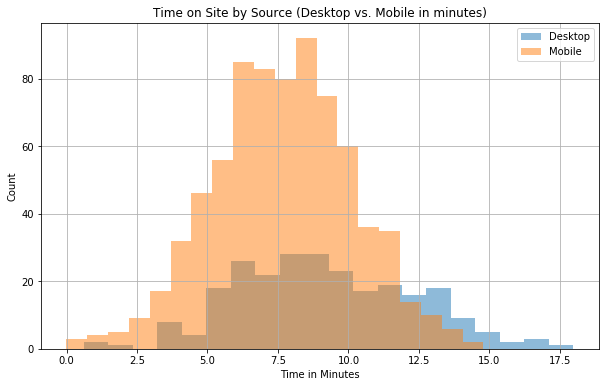

In [12]:
import matplotlib.pyplot as plt

user_data.groupby('mobile').time_on_site_min.hist(bins=20, alpha=0.5, figsize=(10,6));
plt.title('Time on Site by Source (Desktop vs. Mobile in minutes)');
plt.ylabel('Count')
plt.xlabel('Time in Minutes')
plt.legend(['Desktop','Mobile']);

In [13]:
# Let's use crosstabulation to try to see what's going on
pd.crosstab(user_data['purchased'], user_data['time_on_site'])

time_on_site  0.000000     27.709407    ...  1009.526383  1078.798156
purchased                               ...                          
False                   1            0  ...            0            0
True                    0            1  ...            1            1

[2 rows x 1000 columns]

In [14]:
# OK, that's not quite what we want
# Time is continuous! We need to put it in discrete buckets
# Pandas calls these bins, and pandas.cut helps make them

time_bins = pd.cut(user_data['time_on_site_min'], 5)  # 5 equal-sized bins
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased            False     True 
time_on_site_min                    
(-0.0298, 3.587]  0.050575  0.031858
(3.587, 7.185]    0.406897  0.290265
(7.185, 10.783]   0.434483  0.483186
(10.783, 14.382]  0.101149  0.175221
(14.382, 17.98]   0.006897  0.019469

In [15]:
pd.crosstab(columns=user_data['purchased'], index=time_bins, normalize='index')

purchased            False     True 
time_on_site_min                    
(-0.0298, 3.587]  0.550000  0.450000
(3.587, 7.185]    0.519062  0.480938
(7.185, 10.783]   0.409091  0.590909
(10.783, 14.382]  0.307692  0.692308
(14.382, 17.98]   0.214286  0.785714

In [16]:
# We can make this a bit clearer by normalizing (getting %)
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased            False     True 
time_on_site_min                    
(-0.0298, 3.587]  0.050575  0.031858
(3.587, 7.185]    0.406897  0.290265
(7.185, 10.783]   0.434483  0.483186
(10.783, 14.382]  0.101149  0.175221
(14.382, 17.98]   0.006897  0.019469

In [17]:
# That seems counter to our hypothesis
# More time on the site can actually have fewer purchases

# But we know why, since we generated the data!
# Let's look at mobile and purchased
pd.crosstab(user_data['purchased'], user_data['mobile'], normalize='columns')

mobile     False     True 
purchased                 
False      0.484  0.418667
True       0.516  0.581333

In [18]:
# Yep, mobile users are more likely to buy things
# But we're still not seeing the *whole* story until we look at all 3 at once

# Live/stretch goal - how can we do that?
pd.crosstab(time_bins, [user_data['purchased'], user_data['mobile']], normalize='columns')

purchased            False               True           
mobile               False     True      False     True 
time_on_site_min                                        
(-0.0298, 3.587]  0.033058  0.057325  0.007752  0.038991
(3.587, 7.185]    0.338843  0.433121  0.201550  0.316514
(7.185, 10.783]   0.429752  0.436306  0.372093  0.516055
(10.783, 14.382]  0.173554  0.073248  0.348837  0.123853
(14.382, 17.98]   0.024793  0.000000  0.069767  0.004587

In [19]:
pd.crosstab(time_bins, user_data['purchased'], normalize='columns')

purchased            False     True 
time_on_site_min                    
(-0.0298, 3.587]  0.050575  0.031858
(3.587, 7.185]    0.406897  0.290265
(7.185, 10.783]   0.434483  0.483186
(10.783, 14.382]  0.101149  0.175221
(14.382, 17.98]   0.006897  0.019469

## Stanford Open Police Project
https://openpolicing.stanford.edu/findings/

In [20]:
!unzip jb084sr9005_nj_statewide_2019_02_25.csv.zip
!ls

unzip:  cannot find or open jb084sr9005_nj_statewide_2019_02_25.csv.zip, jb084sr9005_nj_statewide_2019_02_25.csv.zip.zip or jb084sr9005_nj_statewide_2019_02_25.csv.zip.ZIP.
sample_data


In [21]:
%%time
df = pd.read_csv('./share/data/opp-for-archive/nj_statewide_2019_02_25.csv')
print(df.shape)

FileNotFoundError: ignored

In [0]:
df.head()

In [0]:
df.isna().sum()

In [0]:
# What are the most common violations?
df.violation.value_counts().head(10)

In [0]:
# What can we infer about vehicle make and likelihood of getting pulled over?
df.vehicle_make.value_counts(normalize=True).head(10)

In [0]:
# What can we infer about this statement? Are other confounding relationships needed (male, female, race, etc.)?
df[df.violation == '39:4-98 RATES OF SPEED'].vehicle_make.value_counts(normalize=True).head(10)

In [0]:
# What about vehicle color?
df[df.violation == '39:4-98 RATES OF SPEED'].vehicle_color.value_counts(normalize=True).head(10)

## Using %%timeit for Different Pandas Operations

In [0]:
df = pd.DataFrame({'a': np.arange(1e6),
                  'b': 2*np.arange(1e6)})
print(df.shape)
df.head()

In [0]:
%timeit df['c'] = df['a']**2

In [0]:
from tqdm import tqdm
tqdm.pandas()

In [0]:
%timeit df['c2'] = df['a'].apply(lambda x: x**2)

In [0]:
%timeit df['c3'] = df['a'].progress_apply(lambda x: x**2)

## Assignment - what's going on here?

Consider the data in `persons.csv` (already prepared for you, in the repo for the week). It has four columns - a unique id, followed by age (in years), weight (in lbs), and exercise time (in minutes/week) of 1200 (hypothetical) people.

Try to figure out which variables are possibly related to each other, and which may be confounding relationships.

In [40]:
# TODO - your code here
# Use what we did live in lecture as an example

# HINT - you can find the raw URL on GitHub and potentially use that
# to load the data with read_csv, or you can upload it yourself
import pandas as pd

df = pd.read_csv('./persons.csv')

df = df.drop(columns=['Unnamed: 0'])

df.head()

age  weight  exercise_time
0   44     118            192
1   41     161             35
2   46     128            220
3   39     216             57
4   28     116            182

In [41]:
# Checking for negative values
print(df[df.age < 0.0])
print(df[df.weight < 0.0])
print(df[df.exercise_time < 0.0])

Empty DataFrame
Columns: [age, weight, exercise_time]
Index: []
Empty DataFrame
Columns: [age, weight, exercise_time]
Index: []
Empty DataFrame
Columns: [age, weight, exercise_time]
Index: []


In [1]:
!pip install pandas==0.23.4

In [44]:
# Cross tabulation is a method to quantitatively analyze the relationship between multiple variables
# normalizing will return percentage frequencies

age_bins = pd.cut(df.age, 5)
time_bins = pd.cut(df.exercise_time, 5)
weight_bins = pd.cut(df.weight, 5)

pd.crosstab(age_bins, time_bins, normalize="columns")

exercise_time   (-0.3, 60.0]       ...        (240.0, 300.0]
age                                ...                      
(17.938, 30.4]      0.187050       ...              0.225131
(30.4, 42.8]        0.187050       ...              0.298429
(42.8, 55.2]        0.147482       ...              0.350785
(55.2, 67.6]        0.165468       ...              0.125654
(67.6, 80.0]        0.312950       ...              0.000000

[5 rows x 5 columns]

In [31]:
pd.crosstab(time_bins, [age_bins, weight_bins], normalize="columns")

age             (17.938, 30.4]      ...         (67.6, 80.0]
weight         (99.854, 129.2]      ...       (216.8, 246.0]
exercise_time                       ...                     
(-0.3, 60.0]            0.1250      ...             0.681818
(60.0, 120.0]           0.1125      ...             0.318182
(120.0, 180.0]          0.2125      ...             0.000000
(180.0, 240.0]          0.2375      ...             0.000000
(240.0, 300.0]          0.3125      ...             0.000000

[5 rows x 25 columns]

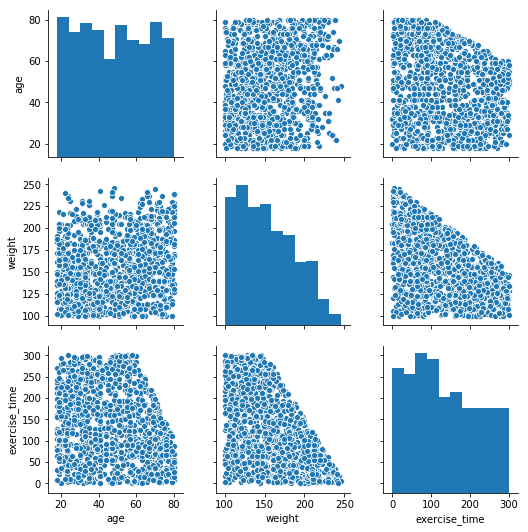

In [43]:
import seaborn as sns

sns.pairplot(df)

### Assignment questions

After you've worked on some code, answer the following questions in this text block:

1.  What are the variable types in the data?
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


### Assignment answers

1.  Age, weight, and time spent exercising per week are all continuous numerical, or quantitative, variables that are measured in a discrete manner. 
2.  What are the relationships between the variables?
3.  Which relationships are "real", and which spurious?


## Stretch goals and resources

Following are *optional* things for you to take a look at. Focus on the above assignment first, and make sure to commit and push your changes to GitHub.

- [Spurious Correlations](http://tylervigen.com/spurious-correlations)
- [NIH on controlling for confounding variables](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4017459/)

Stretch goals:

- Produce your own plot inspired by the Spurious Correlation visualizations (and consider writing a blog post about it - both the content and how you made it)
- Pick one of the techniques that NIH highlights for confounding variables - we'll be going into many of them later, but see if you can find which Python modules may help (hint - check scikit-learn)